In [1]:
# importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8 , 4

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
"""understanding the dataset"""
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

In [4]:
# checking for any potential corrupted rows and columns
def check_rows_cols(input_dataset):
    row = 0
    col = 0
    for i in range(dataset.shape[0]):
        row = row + 1
        
    for j in range(dataset.shape[1]):
        col = col + 1
        
    return row, col

check_rows_cols(dataset)

#hence all rows and cols are fine and ready for further exploration

(10000, 14)

In [5]:
# checking for any missing values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# renaming the dataset
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
dataset.columns = ["Row_Numbers" , "Customer_ID" , "Surname", "Credit_Score", "Geography", "Gender(M/F)" , 
                   "Age" , "Tenure" , "Balance" , "Total_products" , "Credit_card" , "IsActiveMember" , "Salary" , "Exited"]
dataset.head()

,Row_Numbers,Customer_ID,Surname,Credit_Score,Geography,Gender(M/F),Age,Tenure,Balance,Total_products,Credit_card,IsActiveMember,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


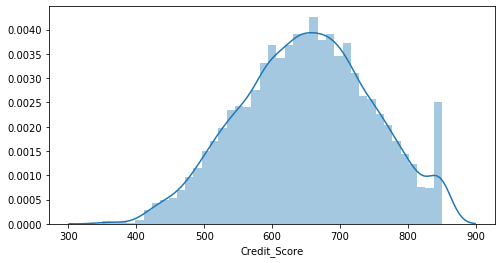

In [8]:
#understanding the Credit_score
sns.distplot(dataset["Credit_Score"])

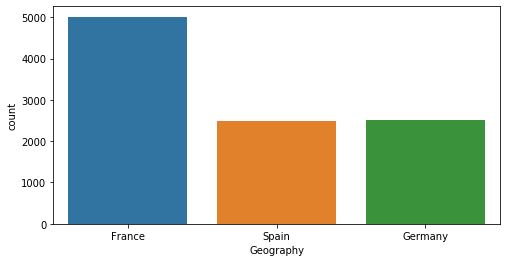

In [9]:
# understanding the geography 
sns.countplot(data = dataset , x= "Geography")

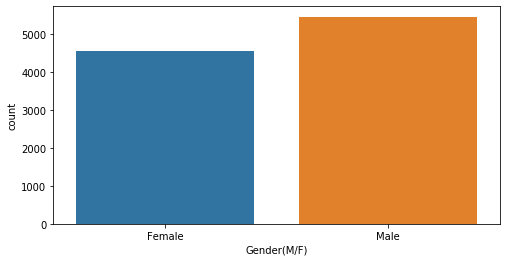

In [10]:
# understanding the Gender
sns.countplot(data = dataset , x = "Gender(M/F)")

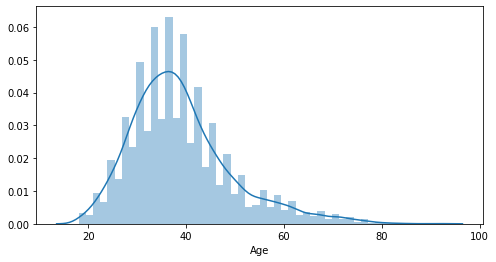

In [11]:
# understanding the age groups
sns.distplot(dataset["Age"])


In [12]:
# splitting the dataset into independent(x) and dependent(y) dataset variable

x = dataset.iloc[: , 3:13].values
y = dataset.iloc[: , -1].values
print(x)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [14]:
# encoding the gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[: , 2])
x

# here female -> 0 , male -> 1 

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [15]:
# hot encoding the Geography column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cm = ColumnTransformer(transformers= [("Geography" , OneHotEncoder() , [1])] , remainder= "passthrough")
x = cm.fit_transform(x)
x

#france=1.0 , 0.0 , 0.0
#      spain -> 0.0 , 0.0 , 1.0
#      germany -> 0.0 , 1.0 , 0.0

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [19]:
# feature scalling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.00280393, -0.57873591,  1.74273971, ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.99720391, -0.57873591, -0.57380915, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [20]:
# splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .20 , random_state = None)



In [35]:
# implementing support Vector on the training dataset

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
# predicting the test dataset
y_preg = classifier.predict(x_test)

In [37]:
# making the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preg)
cm

array([[1574,   37],
       [ 248,  141]], dtype=int64)

In [50]:
# accuracy of the model
accuracy = (1574 + 141)/(1574 + 141 + 248 + 37)

print("Accuracy of the model :" , accuracy*100 , "%")

Accuracy of the model : 85.75 %
